In [1]:
import os
import pandas as pd 
import numpy as np 

# visualisation
import matplotlib.pylab as plt
import matplotlib.font_manager as fm

# our scripts 
import src.processing as sp 
import settings as st
import utils.helpers as hp

### Correct for the locations of the images 

In [ ]:
# dr5_desc = sp.read_parquet('gz_decals_volunteers_5', save = True, filename='decals_5_votes')

### Generate the descriptions for spiral and elliptical 

In [11]:
# dr5_desc = hp.read_parquet(st.data_dir, 'descriptions/decals_5_votes')

In [12]:
# dr5_spiral = sp.filtering(dr5_desc, st.condition_spiral, save=False, filename = 'decals_5_spiral')

In [13]:
# dr5_elliptical = sp.filtering(dr5_desc, st.condition_elliptical, save=False, filename = 'decals_5_elliptical')

### Subset of the Spirals and Ellipticals 

In [17]:
# df_spiral= sp.subset_df(dr5_spiral, 3000, random=True, save=True, filename='subset_spiral')

In [18]:
# df_elliptical = sp.subset_df(dr5_elliptical, 3000, random=True, save=True, filename='subset_elliptical')

### Move data
Given a pandas dataframe, copy images from Mike's folder to our folder.

In [2]:
df_spiral = hp.read_parquet(st.data_dir, 'descriptions/subset_spiral')
df_elliptical = hp.read_parquet(st.data_dir, 'descriptions/subset_elliptical')

In [3]:
# sp.copy_images(df_spiral, 'spiral')
# sp.copy_images(df_elliptical, 'elliptical')

3000 images saved to /data/phys-zooniverse/phys2286/data/images/spiral/
3000 images saved to /data/phys-zooniverse/phys2286/data/images/elliptical/


### Split the data into Training/Validation

In [2]:
d = sp.split_data(['spiral', 'elliptical'], val_size = 0.25, test_size = 0.25, save=True)

In [9]:
d['spiral']['test'].shape

(750, 128)

In [10]:
d['spiral']['validate'].shape

(750, 128)

In [11]:
d['spiral']['train'].shape

(1500, 128)

### Generate the Training/Validation sets (images)

In [2]:
# sp.images_train_validate_test(['spiral', 'elliptical'])

### Calculate Scores from Script

In [1]:
from evaluate import load_ml_model, calculate_scores
import utils.helpers as hp
import utils.imaging as ui
import settings as st 
import matplotlib.pylab as plt

In [2]:
model_path = '../fs-models/siamese_resnet18.pth'
model = load_ml_model(model_path)

In [3]:
test_image = 'J102532.37+052457.6'
df_loc = '/data/phys-zooniverse/phys2286/data/descriptions'

In [4]:
dataframe = hp.read_parquet(df_loc, 'decals_5_votes')

In [6]:
dataframe.shape

(253286, 128)

In [5]:
%%time
scores = calculate_scores(test_image, dataframe, model, save=True)

CPU times: user 14.4 s, sys: 710 ms, total: 15.1 s
Wall time: 17.8 s


In [7]:
scores[test_image].head()

iauname          ra        dec  redshift  \
0  J112953.88-000427.4  172.474526  -0.074281  0.124142   
1  J104325.29+190335.0  160.856533  19.060441  0.049088   
2  J104629.54+115415.1  161.623135  11.904197  0.092906   
3  J082950.68+125621.8  127.461190  12.939386  0.066619   
4  J122056.00-015022.0  185.233342  -1.839340  0.070042   

                        png_loc    scores  
0  J112/J112953.88-000427.4.png  0.954543  
1  J104/J104325.29+190335.0.png  0.989268  
2  J104/J104629.54+115415.1.png  0.224629  
3  J082/J082950.68+125621.8.png  0.687622  
4  J122/J122056.00-015022.0.png  0.586288

Setting a bound/threshold

In [8]:
selected = scores[test_image][scores[test_image].scores > 0.8]

In [9]:
selected.shape

(35, 6)

In [10]:
selected.head()

iauname          ra        dec  redshift  \
0   J112953.88-000427.4  172.474526  -0.074281  0.124142   
1   J104325.29+190335.0  160.856533  19.060441  0.049088   
6   J151949.21+280418.7  229.955055  28.071840  0.045993   
12  J142243.63+285314.7  215.681840  28.887422  0.054609   
13  J144949.68+162403.2  222.457029  16.400895  0.126695   

                         png_loc    scores  
0   J112/J112953.88-000427.4.png  0.954543  
1   J104/J104325.29+190335.0.png  0.989268  
6   J151/J151949.21+280418.7.png  0.926705  
12  J142/J142243.63+285314.7.png  0.818709  
13  J144/J144949.68+162403.2.png  0.854309

In [11]:
img1 = dataframe[dataframe['iauname'] == test_image].png_loc.values[0]
img_1 = ui.load_image_full(st.decals + '/' + img1)

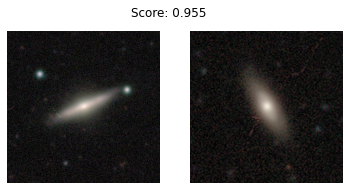

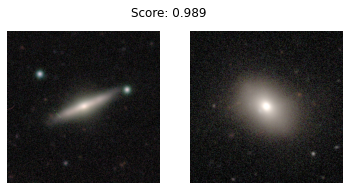

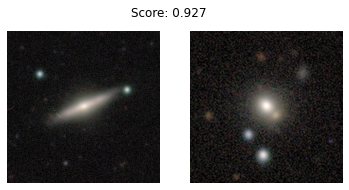

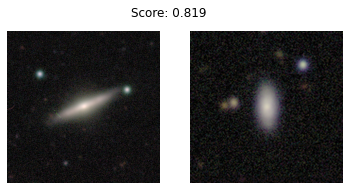

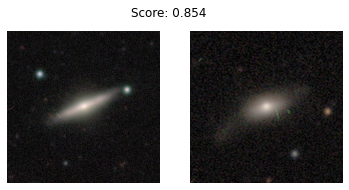

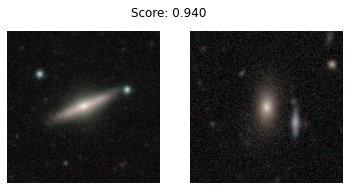

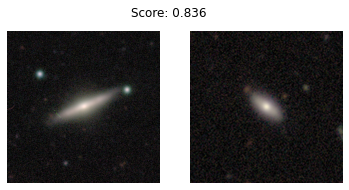

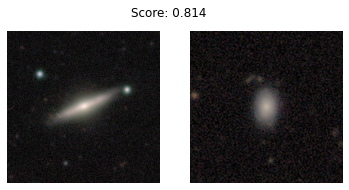

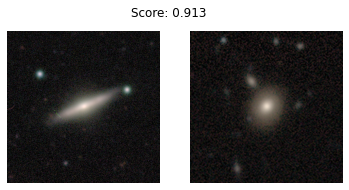

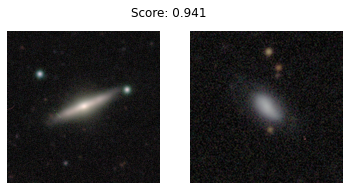

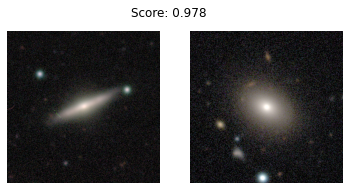

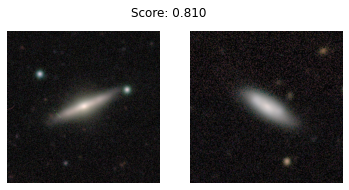

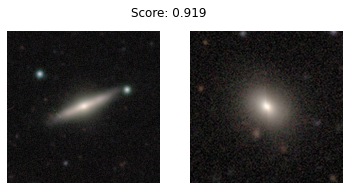

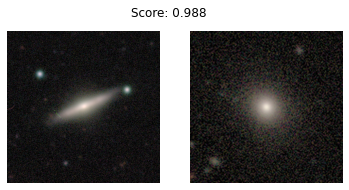

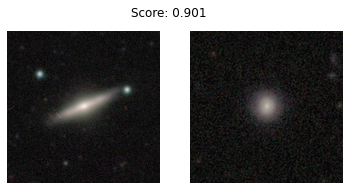

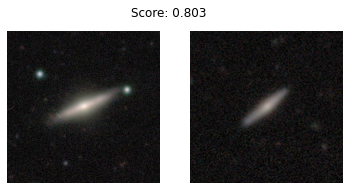

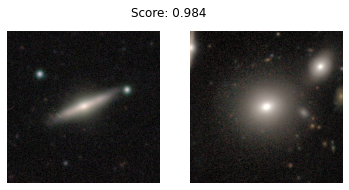

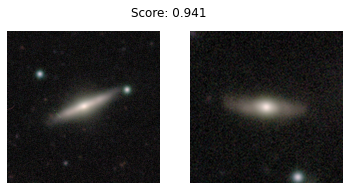

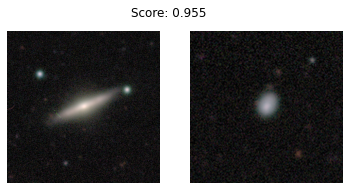

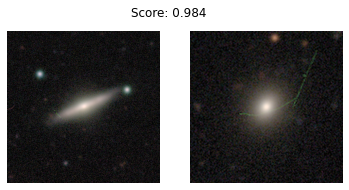

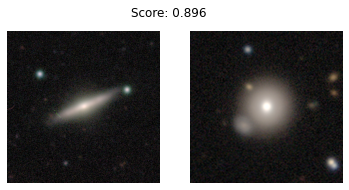

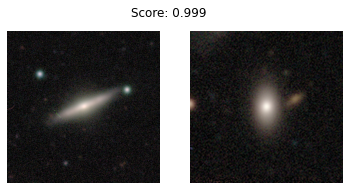

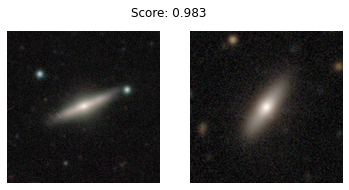

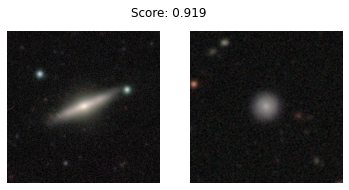

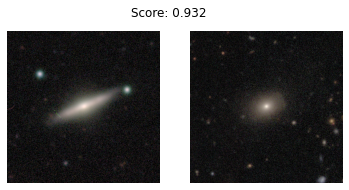

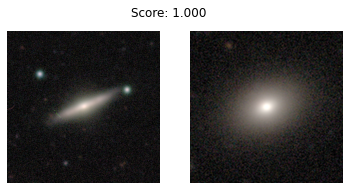

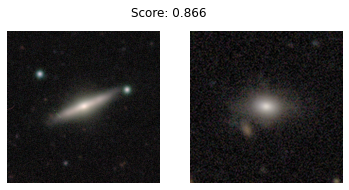

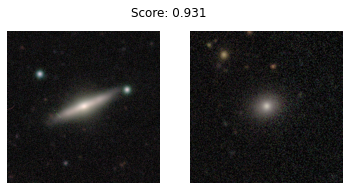

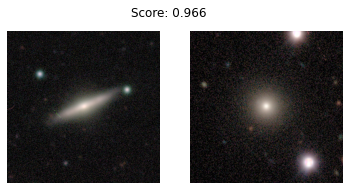

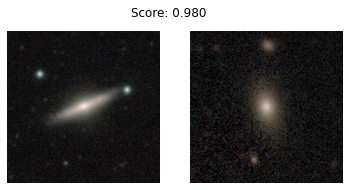

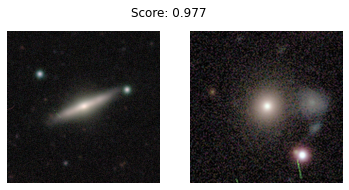

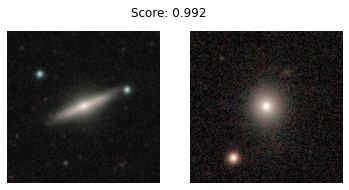

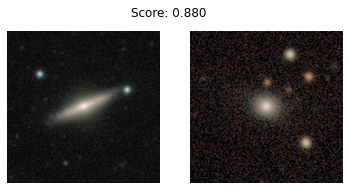

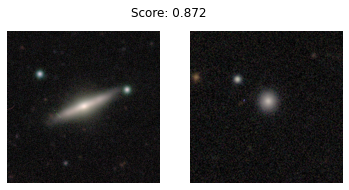

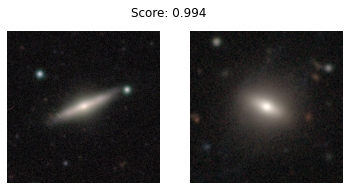

In [12]:
for idx in range(selected.shape[0]):
    img2 = selected.png_loc.values[idx]
    img_2 = ui.load_image_full(st.decals + '/' + img2)

    plt.figure()
    plt.suptitle(f'Score: {selected.scores.values[idx]:.3f}', y=0.85)
    plt.subplot(121)
    plt.imshow(img_1[1], cmap = 'gray')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(img_2[1], cmap = 'gray')
    plt.axis('off')
    plt.show()